<a href="https://colab.research.google.com/github/snehilshandilya/lecture-1/blob/main/HW_Week_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/bank-additional-full.csv", sep = ";")

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)

In [7]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

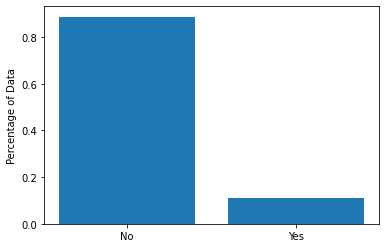

In [9]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [10]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

#### Based on the visualization above, we see that there are class imbalances between 'No' and 'Yes'. So, to manage that, we can resample the data. Resampling the data helps out with class imbalances and is often used to get more accurate results. There are three possible ways to resample the data:
1. Overfitting 
2. Underfitting
3. SMOTE

#### Here, I will be resampling using SMOTE 

In [11]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_scaled, y_train = oversample.fit_resample(X_scaled, y_train) 

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [60]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

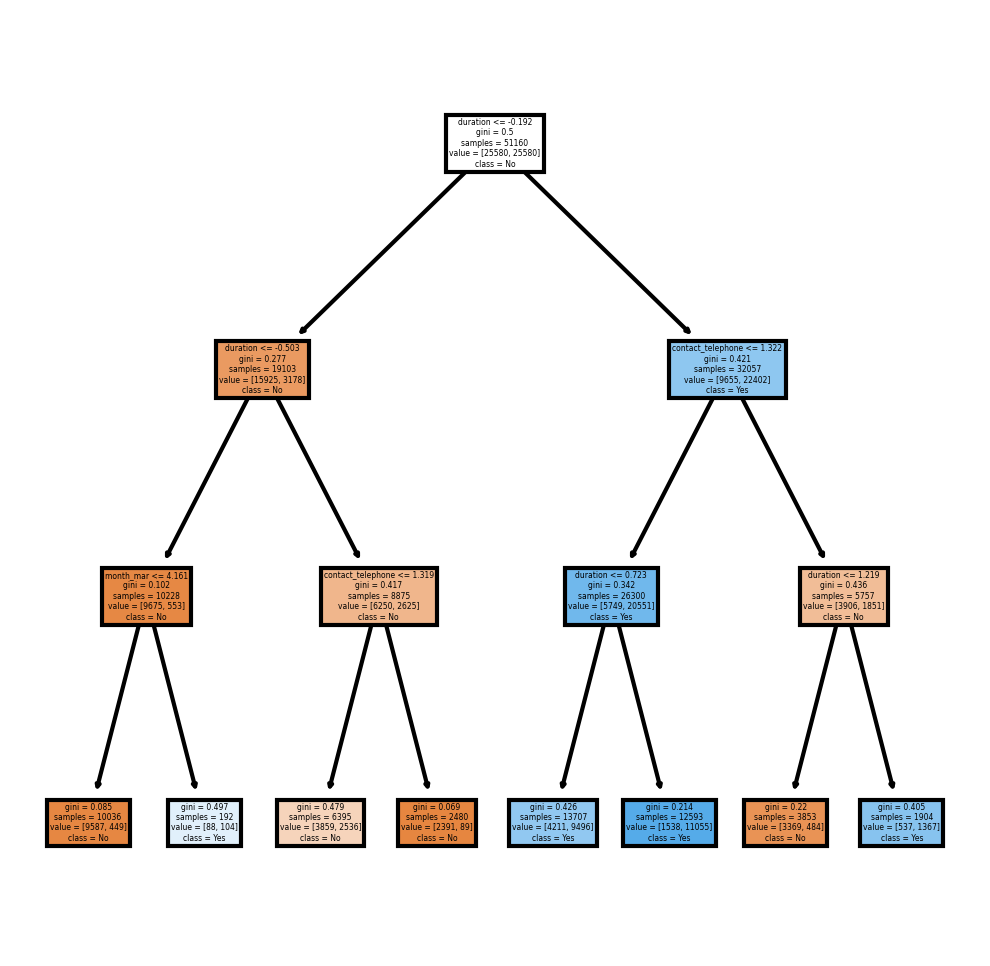

In [62]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled = True, feature_names = X.columns, class_names=["No","Yes"])

               
fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [14]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

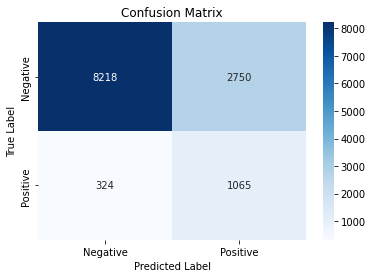

In [15]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree 

In [16]:

dtree = DecisionTreeClassifier(max_depth = 3)

bagging = BaggingClassifier(base_estimator=dtree, 
                            n_estimators=100, 
                            max_samples=0.5, 
                            max_features=1.)



bagging.fit(X_scaled, y_train)

y_pred = bagging.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.7525289309703003


In [17]:
y_pred = bagging.predict(X_test)
y_true = y_test
cm_bag = confusion_matrix(y_true, y_pred)

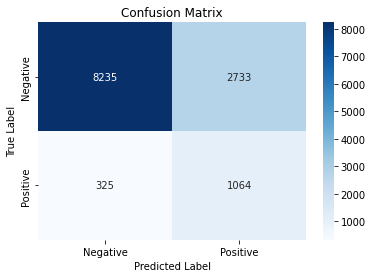

In [18]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [19]:
from sklearn.ensemble import AdaBoostClassifier

In [20]:
dtree = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(base_estimator=dtree, n_estimators=50, learning_rate=0.1)

adaboost.fit(X_scaled, y_train)

y_pred = adaboost.predict(X_test)
y_pred

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [21]:
y_pred = adaboost.predict(X_test)
y_true = y_test
cm_boost = confusion_matrix(y_true, y_pred)

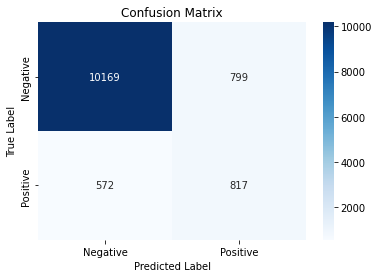

In [22]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 5 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [23]:
pip install mlens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 KB 13.3 MB/s eta 0:00:00


In [24]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
from xgboost import XGBClassifier

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from mlens.ensemble import SuperLearner
from sklearn.neighbors import KNeighborsClassifier

[MLENS] backend: threading


In [27]:
### SET YOUR BASE LEARNERS

base_learner = [
    LogisticRegression(),
    RandomForestClassifier(),
    KNeighborsClassifier(n_neighbors = 5),
    XGBClassifier(),
    AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50)
    
]

super_learner = SuperLearner()
super_learner.add(base_learner)
### FIT TO TRAINING DATA

super_learner.fit(X_scaled, y_train)

### GET base_predictions
base_prediction = super_learner.predict(X_scaled)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A 

In [28]:
base_prediction

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)

#### Training the metalearner

In [29]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(fit_intercept = False).fit(base_prediction, y_train)
log_reg

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(fit_intercept=False)

#### Coefficients 

In [55]:
log_reg.coef_

array([[-2.98191013, -4.38099778, -4.18318226, 16.37020631,  2.51466351]])

The coefficients are the weights assigned to each of the base learners in the meta learner model.

More specifically, the coefficients represent the log odds ratio of the probability of the target variable being 1 given the prediction of a particular base learner, relative to the probability of the target variable being 1 given the prediction of the reference base learner. The reference base learner is typically the first one in the list of base learners.

A positive coefficient for a base learner means that when that base learner predicts a positive outcome, the meta learner is more likely to predict a positive outcome as well. Conversely, a negative coefficient for a base learner means that when that base learner predicts a positive outcome, the meta learner is more likely to predict a negative outcome.

To understand the coefficients in more detail, let's consider the example of the XGBClassifier, which has a positive coefficient of 16.37020631. This means that when the XGBClassifier predicts a positive outcome, the odds of the target variable being 1 (i.e., the positive outcome) are e^16.37020631 times higher than the odds of the target variable being 1 when the reference base learner predicts a positive outcome.

Conversely, for the base learners with negative coefficients (LogisticRegression, RandomForestClassifier, and KNeighborsClassifier), the odds of the target variable being 1 are e^(-2.98191013), e^(-4.38099778), and e^(-4.18318226) times lower, respectively, when these base learners predict a positive outcome, compared to when the reference base learner predicts a positive outcome.

It is worth noting that the magnitude of the coefficients is also important. The larger the magnitude of the coefficient, the stronger the contribution (either positive or negative) of the corresponding base learner to the final prediction of the meta learner.

Overall, the coefficients in the model indicate which base learners are contributing positively or negatively to the final prediction, and to what extent.

In [31]:
y_pred1 = log_reg.predict(super_learner.predict(X_test))

In [32]:
X_test.shape

(12357, 82)

In [33]:
y_test.shape

(12357, 1)

#### Interpreting the coefficients

In [34]:
### MAKE, SAVE AND VISUALIZE YOUR CONFUSION MATRIX
y_true = y_test
cm_super = confusion_matrix(y_true, y_pred1)

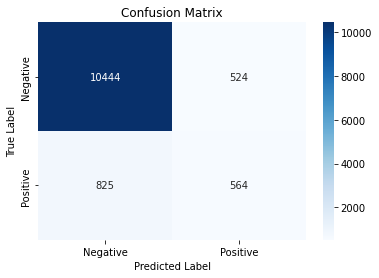

In [65]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_super, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Saving the Confusion Matrix

In [67]:
plt.savefig('bar_plot.png')

<Figure size 432x288 with 0 Axes>

# 6.) Create a bar chart comparing decision tree, bagged, boosted and super learner Sensitivities (Out of Sample)

#### Formula for calculation of Sensitivity: True positive / (True Positive + False Positive) = TP/(TP+FP)

#### Formula for calculation of specificty: True Negatives / (True Negative + False Positive) = TN/(TN+FN)

1. Decision Tree 



Sensitivity

In [46]:
sen1 = 1065/(1065+2750) 
sen1

0.27916120576671033

Specificity

In [47]:
spe1 = 8218/(8218 + 324)
spe1

0.9620697728869118

2. Bagging

Sensitivity

In [48]:
sen2 = 1064/(1064 + 2733)
sen2

0.28022122728469845

Specificity

In [49]:
spe2 = 8235/(8235+325)
spe2

0.9620327102803738

3. Boosting

Sensitivity

In [50]:
sen3 = 817/(817+799)
sen3

0.505569306930693

Specificity

In [51]:
spe3 = 10169/(10169+572)
spe3

0.946746113024858

4. Super Learner

Sensitivity

In [53]:
sen4 = 546/(564+524)
sen4

0.5018382352941176

Specificity

In [54]:
spe4 = 10444/(10444+825)
spe4

0.9267903096991748

In [35]:
#cm_boost, cm_bag, cm_raw, cm_super

(array([[10169,   799],
        [  572,   817]]), array([[8235, 2733],
        [ 325, 1064]]), array([[8218, 2750],
        [ 324, 1065]]), array([[10444,   524],
        [  825,   564]]))

### Bar Plot for all out of sample sensitivities

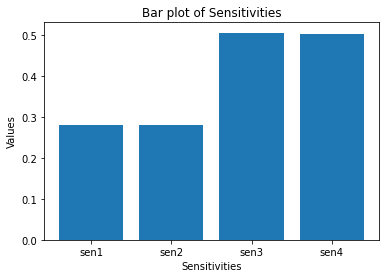

In [56]:
import matplotlib.pyplot as plt

# Create the bar plot
x = ['sen1', 'sen2', 'sen3', 'sen4']
y = [sen1, sen2, sen3, sen4]

plt.bar(x, y)
plt.title('Bar plot of Sensitivities')
plt.xlabel('Sensitivities')
plt.ylabel('Values')
plt.show()

Bar Plot for all out of sample specificities

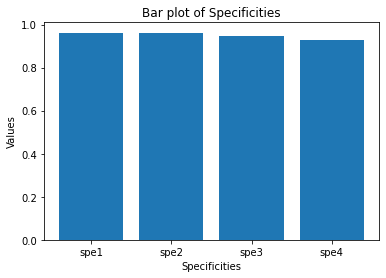

In [57]:
import matplotlib.pyplot as plt

# Create the bar plot
x = ['spe1', 'spe2', 'spe3', 'spe4']
y = [spe1, spe2, spe3, spe4]

plt.bar(x, y)
plt.title('Bar plot of Specificities')
plt.xlabel('Specificities')
plt.ylabel('Values')
plt.show()